### Fraction Improved under EADAM (across n for various k)

Here we look at what fraction of people improved under EADAM for various n, k. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(r'C:\Users\v-kirdwivedi\Documents\GitHub\MatchingAlgorithm')

In [3]:
from multi_funcs_2 import *

In [7]:
ns = [int(np.round(1.5**i)) for i in range(24, 29)]
ks = [5]

In [8]:
ns

[16834, 25251, 37877, 56815, 85223]

In [9]:
for k in ks:
    for n in ns:
        results = f_simulate_all(100, n, k)
        df = make_df_all(n, k, results, save = True)

## Graphing

In [18]:
def get_data():
    df = pd.DataFrame()

    for n in [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]:
        for k in [3,4, 5, 6, 7, 8]:
            df = pd.concat([df, pd.read_csv('data/simulations/fraction_improved_eadam/eadam_over_nn_{}_k_{}_max_diff_eadam.csv'.format(n,k))])
            df['fraction_improved'] = df['n_changes_eadam']/(2*df['n_matches'])
    return df


In [19]:
def get_data2():
    df = pd.DataFrame()

    for n in [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]:
        for k in [3,4, 5, 6, 7, 8]:
            df = pd.concat([df, pd.read_csv('data/simulations/fraction_improved_eadam/eadam_over_nn_{}_k_{}_max_diff.csv'.format(n,k))])
            df['fraction_improved'] = df['n_changes']/df['n_matches']
    return df

In [20]:
df_eadam = get_data()
df_mm = get_data2()

<Axes: xlabel='n', ylabel='fraction_improved'>

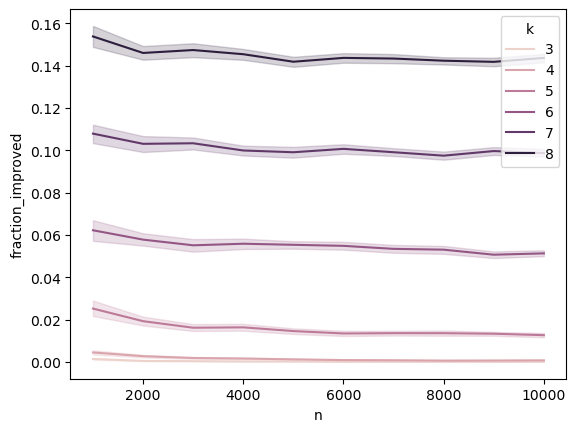

In [21]:
sns.lineplot(x='n', y='fraction_improved', hue='k', data=get_data())

<Axes: xlabel='n', ylabel='fraction_improved'>

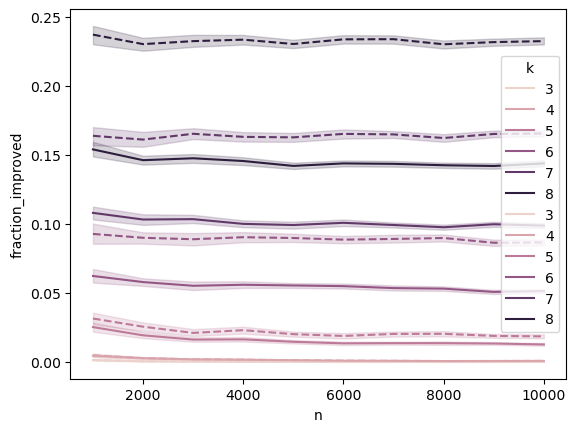

In [22]:
fig, ax = plt.subplots(1,1)

sns.lineplot(x='n', y='fraction_improved', hue='k', data=df_eadam, ax=ax)
sns.lineplot(x='n', y='fraction_improved', hue='k', data=df_mm, ax=ax, linestyle='--')

In [28]:
np.round([1.5**i for i in range(12, 24)])

array([  130.,   195.,   292.,   438.,   657.,   985.,  1478.,  2217.,
        3325.,  4988.,  7482., 11223.])

### Graphing New

In [10]:
ns = [int(np.round(1.5**i)) for i in range(12, 29)]
ks = [3,4,5,6,7,8]

In [11]:
def get_data():
    df = pd.DataFrame()

    for n in ns:
        for k in ks:
            df = pd.concat([df, pd.read_csv('data/simulations/new_scale/n_{}_k_{}_max_diff_eadam.csv'.format(n,k))])
    df['fraction_improved'] = df['n_changes_eadam']/(2*df['n_matches'])
    return df

In [12]:
def get_data2():
    df = pd.DataFrame()

    for n in ns:
        for k in [3,4, 5, 6, 7, 8]:
            df = pd.concat([df, pd.read_csv('data/simulations/new_scale/n_{}_k_{}_max_diff.csv'.format(n,k))])
    df['fraction_improved'] = df['n_changes']/df['n_matches']
    return df

In [13]:
def get_data3():
    df = pd.DataFrame()

    for n in ns:
        for k in [3,4, 5, 6, 7, 8]:
            df1 = pd.read_csv('data/simulations/new_scale/n_{}_k_{}_max_diff.csv'.format(n,k))
            df2 = pd.read_csv('data/simulations/new_scale/n_{}_k_{}_n_scc.csv'.format(n,k))
            df2['n_matches'] = df1['n_matches']
            df2['n'] =df1['n']
            df = pd.concat([df, df2])
    df['fraction_improved'] = df['n_in_cycles']/df['n_matches']
    return df

In [11]:
df_eadam = get_data()
df_mm = get_data2()
df_scc = get_data3()

<Axes: xlabel='n', ylabel='fraction_improved'>

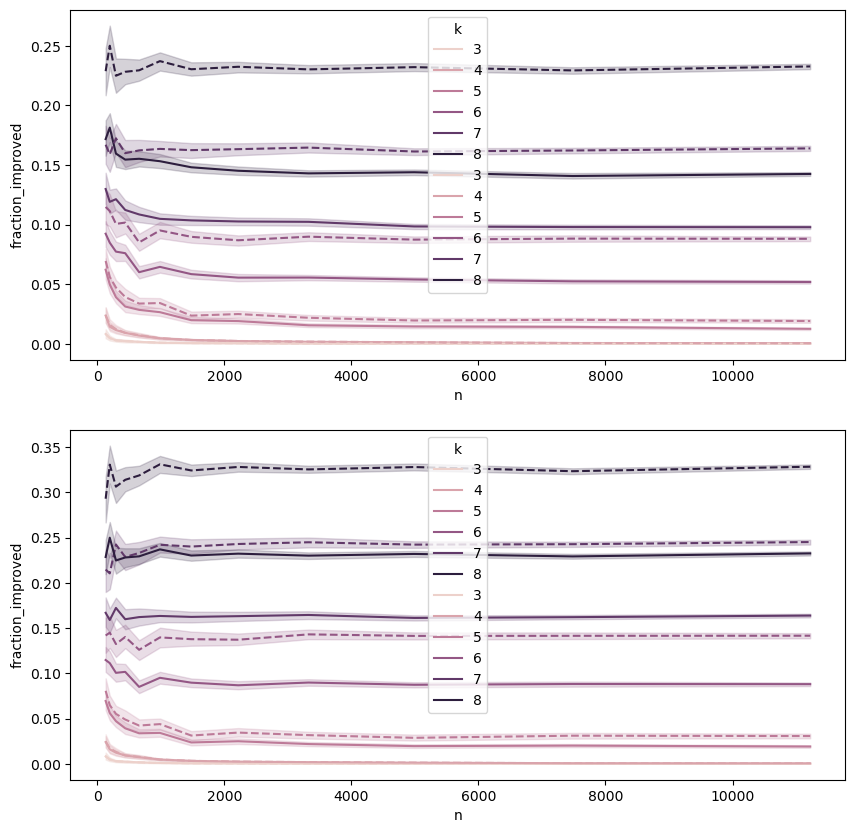

In [13]:
fig, ax = plt.subplots(nrows= 2, ncols=1, figsize=(10,10))

sns.lineplot(x='n', y='fraction_improved', hue='k', data=df_eadam, ax=ax[0])
sns.lineplot(x='n', y='fraction_improved', hue='k', data=df_mm, ax=ax[0], linestyle='--')

sns.lineplot(x='n', y='fraction_improved', hue='k', data=df_scc, ax=ax[1], linestyle='--')
sns.lineplot(x='n', y='fraction_improved', hue='k', data=df_mm, ax=ax[1])

In [14]:
df_eadam = get_data()

In [15]:
df_eadam = df_eadam[df_eadam['k'] == 5]

In [19]:
grouped = df_eadam.groupby('n').mean()

In [20]:
grouped['1/fraction_improved'] = 1/grouped['fraction_improved']

In [23]:
grouped.reset_index(inplace=True)

In [30]:
grouped['log_n'] = np.emath.logn(1.5, grouped['n'])

In [34]:
def get_k(k):
    df_eadam = get_data()
    df_eadam = df_eadam[df_eadam['k'] == k]
    grouped = df_eadam.groupby('n').mean()
    grouped['1/fraction_improved'] = 1/grouped['fraction_improved']
    grouped.reset_index(inplace=True)
    grouped['log_n'] = np.emath.logn(1.5, grouped['n'])
    return grouped

In [29]:
from scipy import stats

Text(0.3, 0.9, 'y = 4.3359+0.1273x')

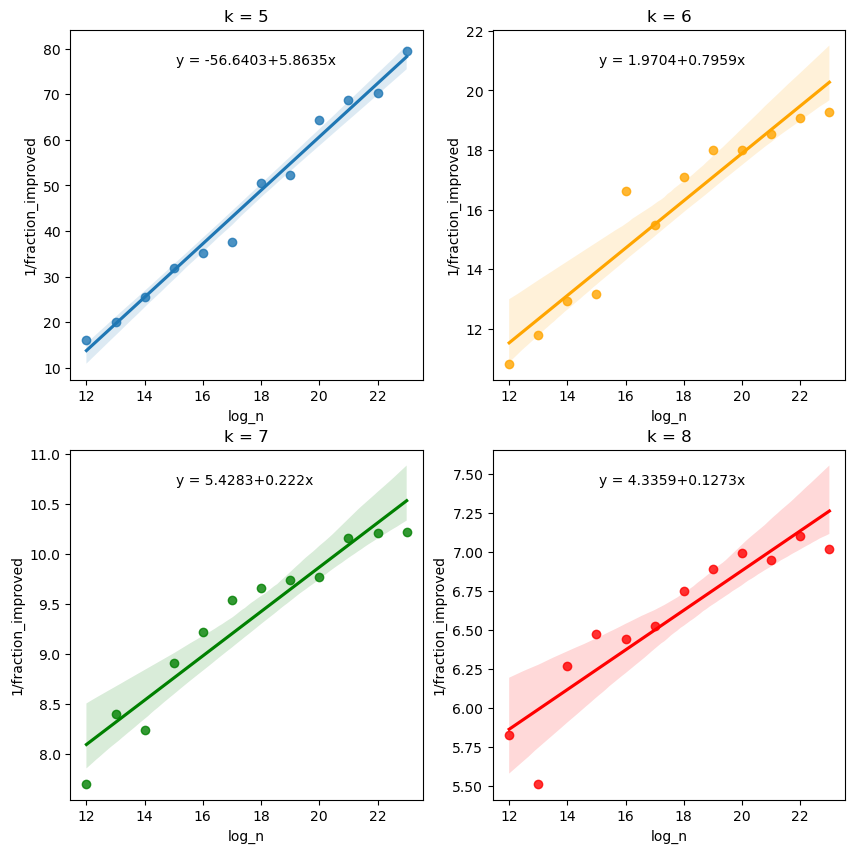

In [38]:
fig, ax = plt.subplots(2,2, figsize = (10,10))

grouped = get_k(5)
sns.regplot(x='log_n', y='1/fraction_improved', data=grouped, ax=ax[0,0])
ax[0,0].set_title('k = 5')
res1 = stats.linregress(grouped['log_n'], grouped['1/fraction_improved'])
ax[0, 0].text(0.3, 0.9, 'y = ' + str(round(res1.intercept, 4))+'+'+str(round(res1.slope,4))+'x', transform=ax[0,0].transAxes)

grouped2 = get_k(6)
sns.regplot(x='log_n', y='1/fraction_improved', data=grouped2, ax=ax[0,1], color='orange')
ax[0,1].set_title('k = 6')
res2 = stats.linregress(grouped2['log_n'], grouped2['1/fraction_improved'])
ax[0, 1].text(0.3, 0.9, 'y = ' + str(round(res2.intercept, 4))+'+'+str(round(res2.slope,4))+'x', transform=ax[0,1].transAxes)

grouped3 = get_k(7)
sns.regplot(x='log_n', y='1/fraction_improved', data=grouped3, ax=ax[1,0], color='green')
ax[1,0].set_title('k = 7')
res3 = stats.linregress(grouped3['log_n'], grouped3['1/fraction_improved'])
ax[1, 0].text(0.3, 0.9, 'y = ' + str(round(res3.intercept, 4))+'+'+str(round(res3.slope,4))+'x', transform=ax[1,0].transAxes)

grouped4 = get_k(8)
sns.regplot(x='log_n', y='1/fraction_improved', data=grouped4, ax=ax[1,1], color='red')
ax[1,1].set_title('k = 8')
res4 = stats.linregress(grouped4['log_n'], grouped4['1/fraction_improved'])
ax[1, 1].text(0.3, 0.9, 'y = ' + str(round(res4.intercept, 4))+'+'+str(round(res4.slope,4))+'x', transform=ax[1,1].transAxes)


In [24]:
def get_data():
    df = pd.DataFrame()

    for n in ns:
        df = pd.concat([df, pd.read_csv('data/simulations/new_scale/n_{}_k_5_max_diff_eadam.csv'.format(n))])
    df['fraction_improved'] = df['n_changes_eadam']/(2*df['n_matches'])
    return df

In [26]:
def get_eadam_5():
    df_eadam = get_data()
    grouped = df_eadam.groupby('n').mean()
    grouped['1/fraction_improved'] = 1/grouped['fraction_improved']
    grouped.reset_index(inplace=True)
    grouped['log_n'] = np.emath.logn(1.5, grouped['n'])
    return grouped

In [27]:
get_eadam_5()

,n,Unnamed: 0,k,n_changes_eadam,n_matches,n_iterations,fraction_improved,1/fraction_improved,log_n
0,130,49.5,5.0,14.76,118.85,12.29,0.062181,16.082178,12.004817
1,195,49.5,5.0,17.72,177.75,14.08,0.049849,20.060683,13.004817
2,292,49.5,5.0,20.80,265.85,17.05,0.039145,25.545961,14.000598
3,438,49.5,5.0,24.92,398.05,20.88,0.031305,31.944186,15.000598
4,657,49.5,5.0,33.96,596.27,23.67,0.028505,35.081859,16.000598
5,985,49.5,5.0,47.60,895.64,30.08,0.026567,37.641058,16.999346
6,1478,49.5,5.0,53.30,1342.99,34.48,0.019835,50.416859,18.000180
7,2217,49.5,5.0,76.94,2014.30,42.52,0.019097,52.363143,19.000180
8,3325,49.5,5.0,94.06,3022.27,51.33,0.015560,64.266002,19.999810
9,4988,49.5,5.0,132.00,4531.04,61.50,0.014568,68.642590,21.000057


Text(0.3, 0.9, 'y = -53.9153+5.7046x')

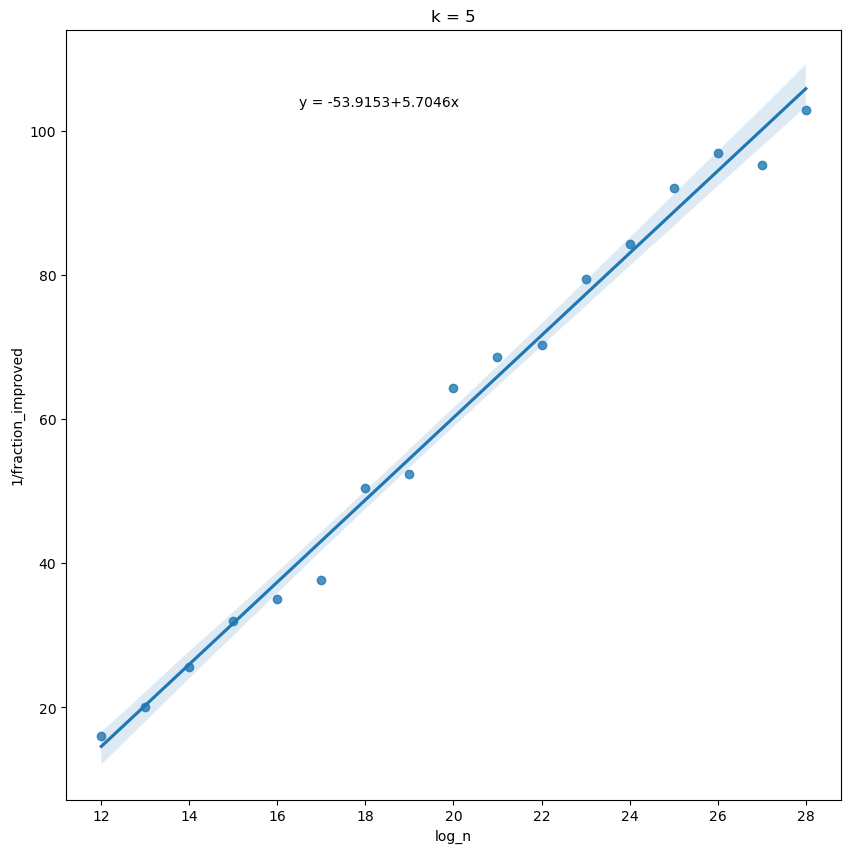

In [30]:
fig, ax = plt.subplots(figsize = (10,10))

grouped = get_eadam_5()
sns.regplot(x='log_n', y='1/fraction_improved', data=grouped, ax=ax)
ax.set_title('k = 5')
res1 = stats.linregress(grouped['log_n'], grouped['1/fraction_improved'])
ax.text(0.3, 0.9, 'y = ' + str(round(res1.intercept, 4))+'+'+str(round(res1.slope,4))+'x', transform=ax.transAxes)